# FANDANGO
Previously in 2015, Fandango (a movie rating aggregator) was proven to be inflating their movie reviews. Fandango claimed that there was a bug in the system that caused it and they will correct it.

We are now reviewing Fandango again to see if they have corrected their rating system.

In [1]:
import pandas as pd

In [2]:
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
before = before[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]
print(before.head(3))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  


In [4]:
after = after[['movie','year','fandango']]
print(after.head(3))

                 movie  year  fandango
0  10 Cloverfield Lane  2016       3.5
1             13 Hours  2016       4.5
2  A Cure for Wellness  2016       3.0


The sampling doesn't represent the population. They are both purposive samples.
Hickey's sample only include movies in 2015 and have at least 30 fan ratings.
The other sample only include movies released 2016 onwards with considerable votes and reviews.

The updated goal will be: To compare Fandango rating of popular movies from year 2015 with year 2016. We can still determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [5]:
before['year'] = before['FILM'].str[-5:-1]
fandango2015 = before[before['year'] == '2015']
len(fandango2015)

129

In [6]:
fandango2016 = after[after['year'] == 2016]
len(fandango2016)

191

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

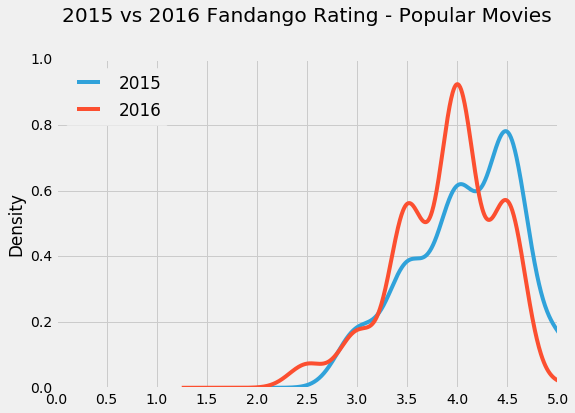

In [30]:
plt.style.use('fivethirtyeight')
fandango2015['Fandango_Stars'].plot.kde(label='2015')
fandango2016['fandango'].plot.kde(label='2016', figsize = (8,5.5))
plt.title('2015 vs 2016 Fandango Rating - Popular Movies', y=1.1)
plt.xlim(0,5)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.legend(loc='upper left')

2016 movies were slightly lower rated than 2015.
But in general both year ratings were very much left skewed, meaning majority of movies in both ratings are mostly high rated.

In [9]:
fandango2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [10]:
fandango2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

There is a clear difference between the two distributions.
2015 lowest rating was 3.0, whereas 2016 is 2.5.
2015 had a 7% 5 star rating, whereas 2016 had 0.5% 5 star rating.
And, 2016 clearly had more 3.5 and 4.0 ratings as compared to 2015.

In [11]:
mean2015 = fandango2015['Fandango_Stars'].mean()
median2015 = fandango2015['Fandango_Stars'].median()
mode2015 = fandango2015['Fandango_Stars'].mode()[0]

In [12]:
mean2016 = fandango2016['fandango'].mean()
median2016 = fandango2016['fandango'].median()
mode2016 = fandango2016['fandango'].mode()[0]

In [13]:
summary = pd.DataFrame()
summary[2015] = [mean2015, median2015, mode2015]
summary[2016] = [mean2016, median2016, mode2016]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


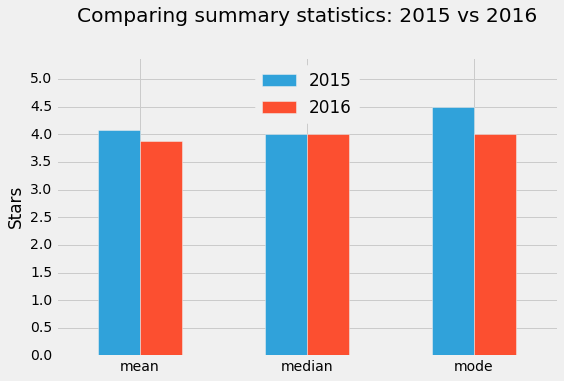

In [35]:
summary.plot.bar(ylim=(0.0,5.4), rot=0, figsize=(8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.1)
plt.yticks(np.arange(0.0,5.5,0.5))
plt.ylabel('Stars')
plt.legend(loc='upper center')

Mean is down by approximately 0.2 stars (5% down from 2015).
Mode is down by 0.5 stars as well.
This confirms our initial finding that 2016 popular movies rating are slightly lower rated than 2015.